# Intro to MLFlow I

#### Immport MLflow

In [1]:
import mlflow

### Connect to MLFlow

In [2]:
MLFLOW_TRACKING_URI = "http://127.0.0.1:5000"

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

In [ ]:
#If not working this will raise an exception
experiments = mlflow.search_experiments()

In [ ]:
#si la conexion no es automatica revisar el url.
experiments

[<Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1749576430291, experiment_id='0', last_update_time=1749576430291, lifecycle_stage='active', name='Default', tags={}>]

In [ ]:
#para crar un experimento nuevo se hace

# mlflow.set_experiment("my_expriment")

### Conect to the Experiment

In [3]:
EXPERIMENT_NAME = "My experiment"

mlflow.set_experiment(EXPERIMENT_NAME)

<Experiment: artifact_location='mlflow-artifacts:/272496244228962745', creation_time=1749578318244, experiment_id='272496244228962745', last_update_time=1749578318244, lifecycle_stage='active', name='My experiment', tags={}>

### Create my first run

In [ ]:
with mlflow.start_run():
    pass

🏃 View run sassy-sloth-518 at: http://127.0.0.1:5000/#/experiments/272496244228962745/runs/82ae315ccbfd4248a9ebde42447dd143
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/272496244228962745


### Log Data into MLFlow

#### Log Tag

In [10]:
with mlflow.start_run():
    mlflow.set_tag("Model name", "Decision Tree")
    mlflow.set_tag("Author", "Jean Paul")

🏃 View run dashing-colt-924 at: http://127.0.0.1:5000/#/experiments/272496244228962745/runs/8a5c1d57627c4f818f247c0ba850a7b3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/272496244228962745


#### Log Parameters

In [11]:
with mlflow.start_run():
    mlflow.log_param("Test Size", 0.2)

🏃 View run amazing-jay-299 at: http://127.0.0.1:5000/#/experiments/272496244228962745/runs/edbced9e576b4fb1aa7fafbb75aea056
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/272496244228962745


#### Log Metrics

In [12]:
with mlflow.start_run():
    mlflow.log_metric("Accuracy", 0.95)

🏃 View run silent-koi-157 at: http://127.0.0.1:5000/#/experiments/272496244228962745/runs/b515b7d9d72044098550a2163ab930ce
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/272496244228962745


### Log parameters, metrics, and tags

In [6]:
TEST_SIZE = 0.3
MODEL = "Decision Tree"

with mlflow.start_run():
    mlflow.set_tag("Model name", MODEL)
    mlflow.log_param("Test Size", TEST_SIZE)
    mlflow.log_metric("Accuracy", 0.95)

🏃 View run delicate-snake-843 at: http://127.0.0.1:5000/#/experiments/272496244228962745/runs/7470a59030ca4255926b114084248eba
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/272496244228962745


### Log Artefartcs

In [5]:
import numpy as np

X = np.random.rand(100, 1)
y = np.random.rand(100, 1)

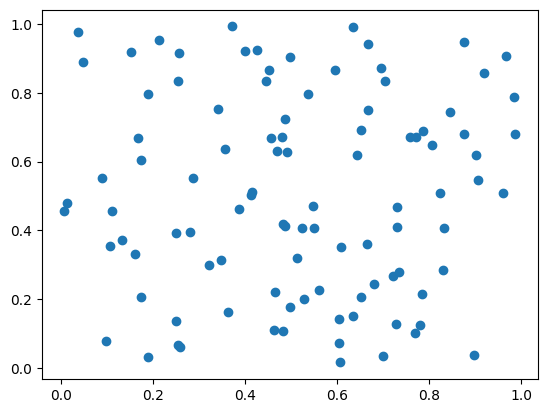

In [6]:
import matplotlib.pyplot as plt

PLOT_PATH = "plot.png"

plt.scatter(X, y)


# Save the plot to a file
plt.savefig(PLOT_PATH)

In [7]:
# Crea un nuevo run y registra el archivo de imagen
with mlflow.start_run():
    mlflow.log_artifact(PLOT_PATH)

🏃 View run ambitious-hog-297 at: http://127.0.0.1:5000/#/experiments/272496244228962745/runs/cde9ccc656d745de812a1ec8eb0ed5e9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/272496244228962745


### Log Model

In [8]:
# Para crear un modelo de Decision Tree y registrarlo
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model

DecisionTreeRegressor()

In [9]:
import mlflow.sklearn


with mlflow.start_run():
    mlflow.sklearn.log_model(model, "model")

2025/06/12 18:36:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run receptive-shrew-882 at: http://127.0.0.1:5000/#/experiments/272496244228962745/runs/3286ab89f78c4b708f7ab3e4413b79e7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/272496244228962745


### Log Model with signature

In [10]:
with mlflow.start_run():
    signature = mlflow.models.infer_signature(model_input=X, model_output=y)
    mlflow.sklearn.log_model(model, "model", signature=signature)

🏃 View run dashing-stork-486 at: http://127.0.0.1:5000/#/experiments/272496244228962745/runs/aa4b6c6cb48e4177b0f2ba41ebfc626d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/272496244228962745


### Log Dataset

In [11]:
import pandas as pd

df = pd.DataFrame({
    "X": X.flatten(),
    "y": y.flatten()
})

In [12]:
with mlflow.start_run():
    dataset = mlflow.data.from_pandas(df)
    mlflow.log_input(dataset)

🏃 View run placid-hound-209 at: http://127.0.0.1:5000/#/experiments/272496244228962745/runs/34998acf006e454e807eb2be2b39128e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/272496244228962745


### Autolog

In [13]:
mlflow.autolog()

2025/06/12 18:36:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [14]:
with mlflow.start_run():
    model.fit(X, y)
    model.predict(X)

🏃 View run bold-sow-654 at: http://127.0.0.1:5000/#/experiments/272496244228962745/runs/49490683caea45dfaf998be9f0370673
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/272496244228962745
